In [3]:
pip install psycopg2-binary


  Obtaining dependency information for psycopg2-binary from https://files.pythonhosted.org/packages/7a/1f/a6cf0cdf944253f7c45d90fbc876cc8bed5cc9942349306245715c0d88d6/psycopg2_binary-2.9.9-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.3 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [6]:
conn = ps.connect(dbname="capstone_final",
                  user="postgres",
                  password="1234",
                  port = "5432")

In [ ]:
--musterılerın ulkelerı ve siparıs sayıları 



In [13]:
sql= """SELECT "customers"."country",
        COUNT("orders"."order_id") AS order_count
    FROM 
        "customers"
    LEFT JOIN 
        "orders" ON "customers"."customer_id" = "orders"."customer_id"
    GROUP BY 
        "customers"."country"
    ORDER BY 
        order_count DESC"""

In [14]:
df = sqlio.read_sql_query(sql,conn)
df.head()


/var/folders/4r/84_425fs5fq5f52bkbg75g140000gn/T/ipykernel_15747/1370716861.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,country,order_count
0,Germany,122
1,USA,122
2,Brazil,83
3,France,77
4,UK,56


In [16]:
df.shape

(21, 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      21 non-null     object
 1   order_count  21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [18]:
df.head(10)

,country,order_count
0,Germany,122
1,USA,122
2,Brazil,83
3,France,77
4,UK,56
5,Venezuela,46
6,Austria,40
7,Sweden,37
8,Canada,30
9,Italy,28


In [19]:
import matplotlib.pyplot as plt

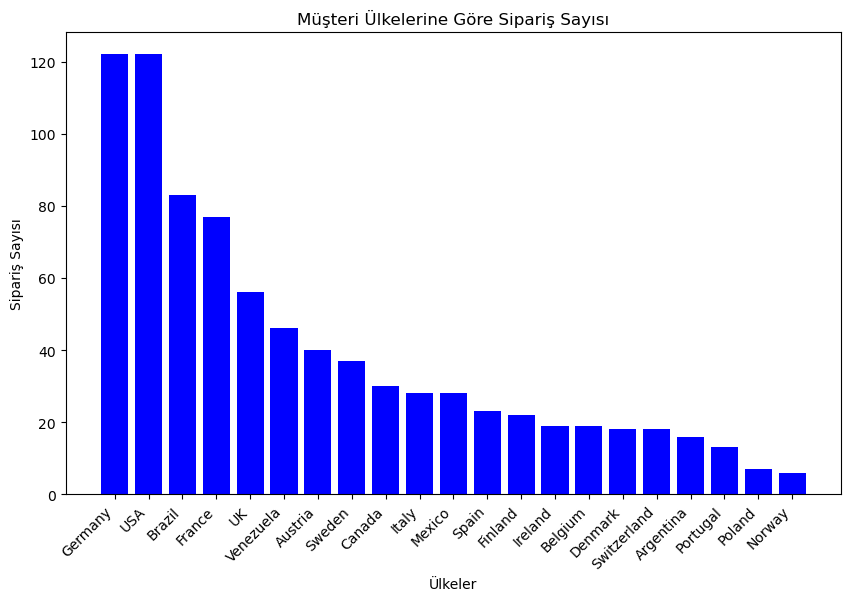

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(df["country"], df["order_count"], color='blue')
plt.title('Müşteri Ülkelerine Göre Sipariş Sayısı')
plt.xlabel('Ülkeler')
plt.ylabel('Sipariş Sayısı')


plt.xticks(rotation=45, ha="right")

plt.show()

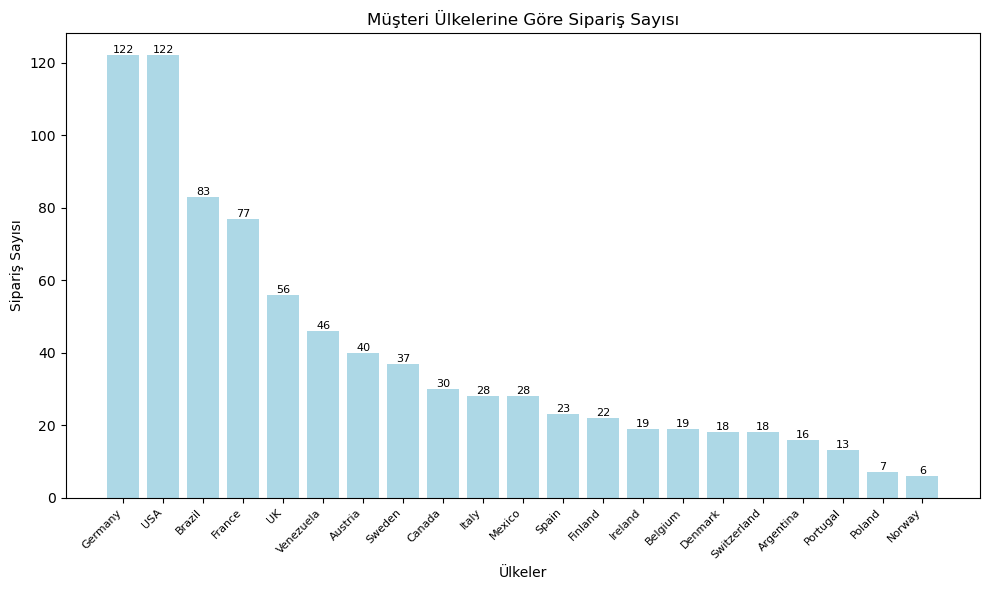

In [25]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df['country'], df['order_count'], color='lightblue')
plt.xlabel('Ülkeler')
plt.ylabel('Sipariş Sayısı')
plt.title('Müşteri Ülkelerine Göre Sipariş Sayısı')

# Çubukların üzerine sipariş sayılarını ekleyelim
for bar, order_count in zip(bars, df['order_count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{order_count}', 
             ha='center', va='bottom', fontsize=8, color='black')

plt.xticks(rotation=45, ha="right", fontsize=8)  # 45 derece döndür ve yazı fontunu küçült
plt.tight_layout()  # Grafik öğelerinin sığmasını sağlar
plt.show()

In [32]:
sql_query = """
    SELECT
    "customers"."country",
    COUNT("orders"."order_id") AS "order_count",
    SUM("orders"."freight") AS "TotalFreight"
FROM
    "customers"
JOIN
    "orders" ON "customers"."customer_id" = "orders"."customer_id"
GROUP BY
    "customers"."country"
ORDER BY
    "order_count" DESC;

"""


In [38]:
df2 = sqlio.read_sql_query(sql_query,conn)
df2.head()

/var/folders/4r/84_425fs5fq5f52bkbg75g140000gn/T/ipykernel_15747/2433481374.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = sqlio.read_sql_query(sql_query,conn)


,country,order_count,TotalFreight
0,Germany,122,11283.2780
1,USA,122,13771.2850
2,Brazil,83,4880.1900
3,France,77,4237.8394
4,UK,56,2954.2700


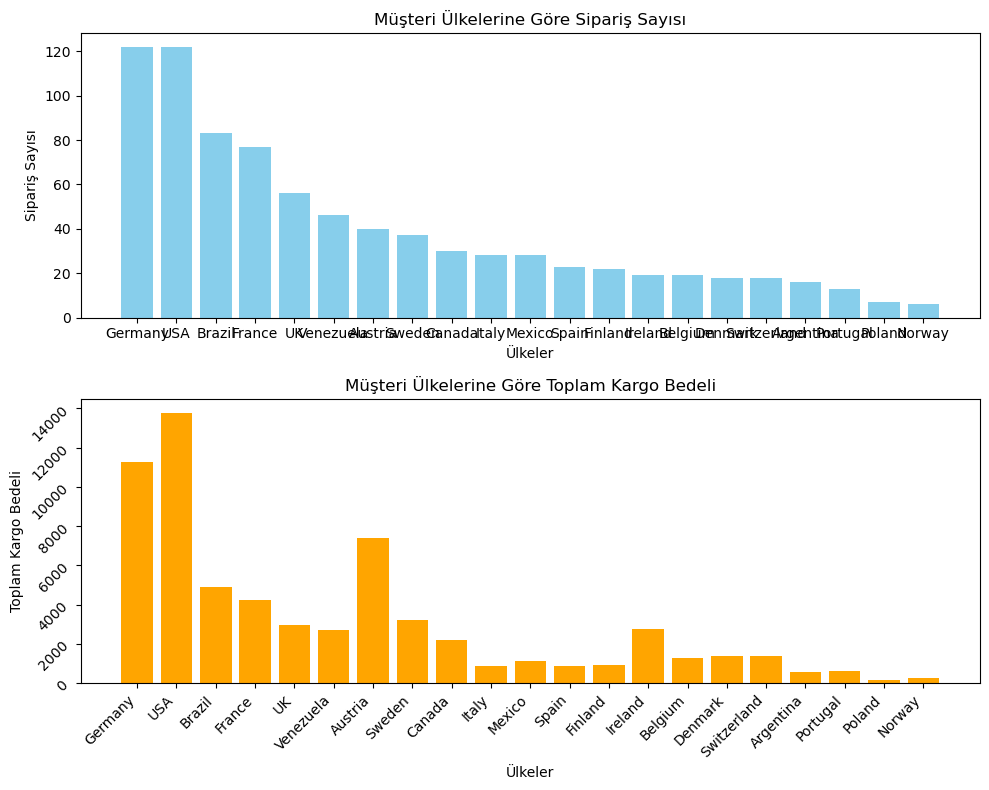

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))


axes[0].bar(df2['country'], df2['order_count'], color='skyblue')
axes[0].set_title('Müşteri Ülkelerine Göre Sipariş Sayısı')
axes[0].set_xlabel('Ülkeler')
axes[0].set_ylabel('Sipariş Sayısı')
plt.yticks(rotation=45, ha="right")

axes[1].bar(df2['country'], df2['TotalFreight'], color='orange')
axes[1].set_title('Müşteri Ülkelerine Göre Toplam Kargo Bedeli')
axes[1].set_xlabel('Ülkeler')
axes[1].set_ylabel('Toplam Kargo Bedeli')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [41]:
print(df2.head())

   country  order_count  TotalFreight
0  Germany          122    11283.2780
1      USA          122    13771.2850
2   Brazil           83     4880.1900
3   France           77     4237.8394
4       UK           56     2954.2700


In [44]:
df2.shape

(21, 3)

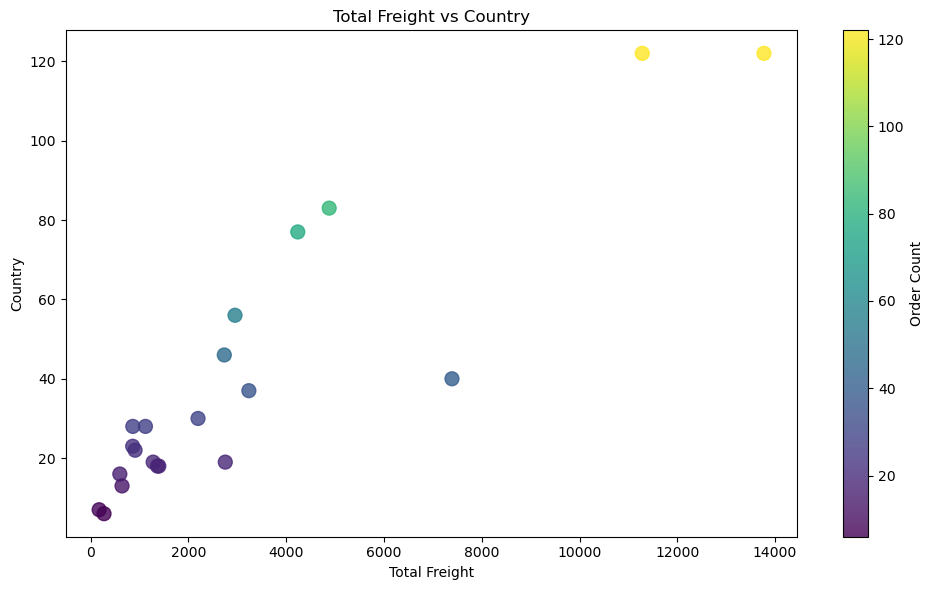

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['TotalFreight'], df2['order_count'], c=df2['order_count'], cmap='viridis', s=100, alpha=0.8)
plt.xlabel('Total Freight')
plt.ylabel('Country')
plt.title('Total Freight vs Country')
plt.colorbar(label='Order Count')
plt.tight_layout()
plt.show()


#Burada toplam kargo  miktarı ile sipariş sayısı arasındaki ilişkiye bakıyoruz. Grafikten, 
#toplam kargo bedeli  arttıkça sipariş sayısının da arttığını görebiliriz. 
# birkaç aykırı değer de var.Doldurulabılır cıkarılabılır ayrı bır grup olarak degerlendırılebılır.